# Import Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Preprocessing

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('data/5guys_flight_data.csv')

C:\Users\jcmuf\AppData\Local\Temp\ipykernel_24748\176002583.py:1: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/5guys_flight_data.csv')


In [4]:
df.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME_x,DEST_AIRPORT_ID,DEST,DEST_CITY_NAME,CRS_DEP_TIME,DEP_TIME,DEP_DELAY_NEW,DEP_DEL15,DEP_TIME_BLK,CRS_ARR_TIME,ARR_TIME,ARR_DELAY_NEW,ARR_TIME_BLK,CANCELLED,CANCELLATION_CODE,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE,DISTANCE_GROUP,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 32,AIRLINE_ID,CARRIER_NAME,MANUFACTURE_YEAR,NUMBER_OF_SEATS,PLANE_AGE,DEPARTING_AIRPORT,ORIGIN_CITY_NAME_y,NAME_x,SEGMENT_NUMBER,PREVIOUS_AIRPORT,DISPLAY_AIRPORT_NAME,ORIGIN_CITY_NAME,NAME_y,STATION,DATE,AWND,PGTM,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5,WT01,WT02,WT03,WT04,WT05,WT06,WT07,WT08,WT09,WESD,WT10,PSUN,TSUN,SN32,SX32,TOBS,WT11
0,1,28,1,UA,N13718,830,13930,ORD,"Chicago, IL",14262,PSP,"Palm Springs, CA",1028,1408.0,220.0,1.0,1000-1059,1306,1604.0,178.0,1300-1359,0.0,NaN,278.0,236.0,1652.0,7,178.0,0.0,0.0,0.0,0.0,NaN,19977,United Air Lines Inc.,1999.000000,124.0,21.000000,Chicago O'Hare International,"Chicago, IL","CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",1.0,NONE,Chicago O'Hare International,"Chicago, IL","CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",USW00094846,2019-1-28,12.75,NaN,0.53,5.0,9.1,18.0,34.0,8.0,300.0,290.0,25.9,35.1,1.0,NaN,NaN,NaN,NaN,1.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,28,1,EV,N14902,4020,13930,ORD,"Chicago, IL",11193,CVG,"Cincinnati, OH",855,1029.0,94.0,1.0,0800-0859,1118,1324.0,126.0,1100-1159,0.0,NaN,83.0,115.0,264.0,2,0.0,0.0,126.0,0.0,0.0,NaN,20366,Atlantic Southeast Airlines,2007.151163,NaN,12.848837,Chicago O'Hare International,"Chicago, IL","CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",1.0,NONE,Chicago O'Hare International,"Chicago, IL","CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",USW00094846,2019-1-28,12.75,NaN,0.53,5.0,9.1,18.0,34.0,8.0,300.0,290.0,25.9,35.1,1.0,NaN,NaN,NaN,NaN,1.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,28,1,UA,N56859,1942,13930,ORD,"Chicago, IL",11292,DEN,"Denver, CO",1011,1031.0,20.0,1.0,1000-1059,1200,1308.0,68.0,1200-1259,0.0,NaN,169.0,217.0,888.0,4,0.0,20.0,48.0,0.0,0.0,NaN,19977,United Air Lines Inc.,2004.000000,216.0,16.000000,Chicago O'Hare International,"Chicago, IL","CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",1.0,NONE,Chicago O'Hare International,"Chicago, IL","CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",USW00094846,2019-1-28,12.75,NaN,0.53,5.0,9.1,18.0,34.0,8.0,300.0,290.0,25.9,35.1,1.0,NaN,NaN,NaN,NaN,1.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,28,1,UA,N37253,2043,13930,ORD,"Chicago, IL",12266,IAH,"Houston, TX",600,636.0,36.0,1.0,0600-0659,853,929.0,36.0,0800-0859,0.0,NaN,173.0,173.0,925.0,4,0.0,36.0,0.0,0.0,0.0,NaN,19977,United Air Lines Inc.,2000.000000,154.0,20.000000,Chicago O'Hare International,"Chicago, IL","CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",1.0,NONE,Chicago O'Hare International,"Chicago, IL","CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",USW00094846,2019-1-28,12.75,NaN,0.53,5.0,9.1,18.0,34.0,8.0,300.0,290.0,25.9,35.1,1.0,NaN,NaN,NaN,NaN,1.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,28,1,UA,N57864,2005,13930,ORD,"Chicago, IL",11292,DEN,"Denver, CO",851,852.0,1.0,0.0,0800-0859,1040,1150.0,70.0,1000-1059,0.0,NaN,169.0,238.0,888.0,4,0.0,0.0,70.0,0.0,0.0,NaN,19977,United Air Lines Inc.,2001.000000,216.0,19.000000,Chicago O'Hare International,"Chicago, IL","CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",1.0,NONE,Chicago O'Hare International,"Chicago, IL","CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",USW00094846,2019-1-28,12.75,NaN,0.53,5.0,9.1,18.0,34.0,8.0,300.0,290.0,25.9,35.1,1.0,NaN,NaN,NaN,NaN,1.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<font color='yellow'>**Handling Duplicates**</font>

In [5]:
print(df.shape)
print(df.duplicated().sum())
df.drop_duplicates(inplace=True)
print(df.shape)

(6593309, 77)
12602
(6580707, 77)


<font color='yellow'>**Checking Unique IDS**</font>

In [6]:
df.nunique()

MONTH                     12
DAY_OF_MONTH              31
DAY_OF_WEEK                7
OP_UNIQUE_CARRIER         17
TAIL_NUM                5881
OP_CARRIER_FL_NUM       7063
ORIGIN_AIRPORT_ID         96
ORIGIN                    96
ORIGIN_CITY_NAME_x        92
DEST_AIRPORT_ID          352
DEST                     352
DEST_CITY_NAME           344
CRS_DEP_TIME            1267
DEP_TIME                1439
DEP_DELAY_NEW           1472
DEP_DEL15                  2
DEP_TIME_BLK              19
CRS_ARR_TIME            1435
ARR_TIME                1440
ARR_DELAY_NEW           1448
ARR_TIME_BLK              19
CANCELLED                  2
CANCELLATION_CODE          4
CRS_ELAPSED_TIME         566
ACTUAL_ELAPSED_TIME      701
DISTANCE                1546
DISTANCE_GROUP            11
CARRIER_DELAY           1368
WEATHER_DELAY           1021
NAS_DELAY                991
SECURITY_DELAY           224
LATE_AIRCRAFT_DELAY      983
Unnamed: 32                0
AIRLINE_ID                17
CARRIER_NAME  

<font color='yellow'>**Dropping IDs**</font>

In [7]:
df.drop(columns=['OP_CARRIER_FL_NUM','Unnamed: 32'],inplace = True)

<font color='yellow'>**Dropping Similar Columns**</font>

In [8]:
# Selecting only one of the similar features
df[['ORIGIN_AIRPORT_ID','ORIGIN','DEST_AIRPORT_ID','DEST','AIRLINE_ID','CARRIER_NAME','OP_UNIQUE_CARRIER','STATION','PLANE_AGE','MANUFACTURE_YEAR']].head()

,ORIGIN_AIRPORT_ID,ORIGIN,DEST_AIRPORT_ID,DEST,AIRLINE_ID,CARRIER_NAME,OP_UNIQUE_CARRIER,STATION,PLANE_AGE,MANUFACTURE_YEAR
0,13930,ORD,14262,PSP,19977,United Air Lines Inc.,UA,USW00094846,21.000000,1999.000000
1,13930,ORD,11193,CVG,20366,Atlantic Southeast Airlines,EV,USW00094846,12.848837,2007.151163
2,13930,ORD,11292,DEN,19977,United Air Lines Inc.,UA,USW00094846,16.000000,2004.000000
3,13930,ORD,12266,IAH,19977,United Air Lines Inc.,UA,USW00094846,20.000000,2000.000000
4,13930,ORD,11292,DEN,19977,United Air Lines Inc.,UA,USW00094846,19.000000,2001.000000


In [9]:
df.drop(columns=['ORIGIN_AIRPORT_ID','DEST_AIRPORT_ID','AIRLINE_ID','OP_UNIQUE_CARRIER','STATION','MANUFACTURE_YEAR'],inplace = True)

In [10]:
df.nunique()

MONTH                     12
DAY_OF_MONTH              31
DAY_OF_WEEK                7
TAIL_NUM                5881
ORIGIN                    96
ORIGIN_CITY_NAME_x        92
DEST                     352
DEST_CITY_NAME           344
CRS_DEP_TIME            1267
DEP_TIME                1439
DEP_DELAY_NEW           1472
DEP_DEL15                  2
DEP_TIME_BLK              19
CRS_ARR_TIME            1435
ARR_TIME                1440
ARR_DELAY_NEW           1448
ARR_TIME_BLK              19
CANCELLED                  2
CANCELLATION_CODE          4
CRS_ELAPSED_TIME         566
ACTUAL_ELAPSED_TIME      701
DISTANCE                1546
DISTANCE_GROUP            11
CARRIER_DELAY           1368
WEATHER_DELAY           1021
NAS_DELAY                991
SECURITY_DELAY           224
LATE_AIRCRAFT_DELAY      983
CARRIER_NAME              17
NUMBER_OF_SEATS           81
PLANE_AGE                 45
DEPARTING_AIRPORT         96
ORIGIN_CITY_NAME_y        93
NAME_x                    85
SEGMENT_NUMBER

In [11]:
#  Name of the city and Airport almost represent the same thing, so dropping city names and keepy airport's
df[['ORIGIN','ORIGIN_CITY_NAME','ORIGIN_CITY_NAME_x','ORIGIN_CITY_NAME_y','NAME_x','NAME_y','DEPARTING_AIRPORT','DISPLAY_AIRPORT_NAME','DISPLAY_AIRPORT_NAME','DEST_CITY_NAME','DEST']].head()

,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_CITY_NAME_x,ORIGIN_CITY_NAME_y,NAME_x,NAME_y,DEPARTING_AIRPORT,DISPLAY_AIRPORT_NAME,DISPLAY_AIRPORT_NAME,DEST_CITY_NAME,DEST
0,ORD,"Chicago, IL","Chicago, IL","Chicago, IL","CHICAGO OHARE INTERNATIONAL AIRPORT, IL US","CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",Chicago O'Hare International,Chicago O'Hare International,Chicago O'Hare International,"Palm Springs, CA",PSP
1,ORD,"Chicago, IL","Chicago, IL","Chicago, IL","CHICAGO OHARE INTERNATIONAL AIRPORT, IL US","CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",Chicago O'Hare International,Chicago O'Hare International,Chicago O'Hare International,"Cincinnati, OH",CVG
2,ORD,"Chicago, IL","Chicago, IL","Chicago, IL","CHICAGO OHARE INTERNATIONAL AIRPORT, IL US","CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",Chicago O'Hare International,Chicago O'Hare International,Chicago O'Hare International,"Denver, CO",DEN
3,ORD,"Chicago, IL","Chicago, IL","Chicago, IL","CHICAGO OHARE INTERNATIONAL AIRPORT, IL US","CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",Chicago O'Hare International,Chicago O'Hare International,Chicago O'Hare International,"Houston, TX",IAH
4,ORD,"Chicago, IL","Chicago, IL","Chicago, IL","CHICAGO OHARE INTERNATIONAL AIRPORT, IL US","CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",Chicago O'Hare International,Chicago O'Hare International,Chicago O'Hare International,"Denver, CO",DEN


In [12]:
df.drop(columns=['ORIGIN_CITY_NAME','ORIGIN_CITY_NAME_x','ORIGIN_CITY_NAME_y','NAME_x','NAME_y','DEST_CITY_NAME','DEPARTING_AIRPORT','DISPLAY_AIRPORT_NAME','DEST_CITY_NAME'],inplace=True)

In [13]:
df.nunique()

MONTH                    12
DAY_OF_MONTH             31
DAY_OF_WEEK               7
TAIL_NUM               5881
ORIGIN                   96
DEST                    352
CRS_DEP_TIME           1267
DEP_TIME               1439
DEP_DELAY_NEW          1472
DEP_DEL15                 2
DEP_TIME_BLK             19
CRS_ARR_TIME           1435
ARR_TIME               1440
ARR_DELAY_NEW          1448
ARR_TIME_BLK             19
CANCELLED                 2
CANCELLATION_CODE         4
CRS_ELAPSED_TIME        566
ACTUAL_ELAPSED_TIME     701
DISTANCE               1546
DISTANCE_GROUP           11
CARRIER_DELAY          1368
WEATHER_DELAY          1021
NAS_DELAY               991
SECURITY_DELAY          224
LATE_AIRCRAFT_DELAY     983
CARRIER_NAME             17
NUMBER_OF_SEATS          81
PLANE_AGE                45
SEGMENT_NUMBER           15
PREVIOUS_AIRPORT         98
DATE                    665
AWND                    128
PGTM                   1129
PRCP                    306
SNOW                

<font color='yellow'>**We are only interested in delayed flights so dropping cencelled flights then dropping the "CANCELLED" column**</font>

In [14]:
df['CANCELLED'].value_counts()

CANCELLED
0.0    6576281
1.0       4426
Name: count, dtype: int64

In [15]:
df = df[df.CANCELLED != 1]
df.drop(columns=['CANCELLED','CANCELLATION_CODE'],inplace = True)

<font color='yellow'>**Merging WT01 & WT02 to WT_Fog**</font>

In [16]:
print(((df['WT01'] == 1) | (df['WT02'] == 1)).sum())
df['WT_FOG'] = np.where((df['WT01'] == 1) | (df['WT02'] == 1), 1, 0)
print((df['WT_FOG'] == 1).sum())
df.drop(columns=['WT01','WT02'],inplace=True)

2276889
2276889


<font color='yellow'>**Creating Date and removing the extra columns**</font>

In [17]:
df.drop(columns=['DATE'],inplace=True)

In [18]:
df.nunique()

MONTH                    12
DAY_OF_MONTH             31
DAY_OF_WEEK               7
TAIL_NUM               5880
ORIGIN                   96
DEST                    352
CRS_DEP_TIME           1267
DEP_TIME               1439
DEP_DELAY_NEW          1472
DEP_DEL15                 2
DEP_TIME_BLK             19
CRS_ARR_TIME           1435
ARR_TIME               1440
ARR_DELAY_NEW          1448
ARR_TIME_BLK             19
CRS_ELAPSED_TIME        564
ACTUAL_ELAPSED_TIME     701
DISTANCE               1546
DISTANCE_GROUP           11
CARRIER_DELAY          1368
WEATHER_DELAY          1021
NAS_DELAY               991
SECURITY_DELAY          224
LATE_AIRCRAFT_DELAY     983
CARRIER_NAME             17
NUMBER_OF_SEATS          81
PLANE_AGE                45
SEGMENT_NUMBER           15
PREVIOUS_AIRPORT         98
AWND                    128
PGTM                   1129
PRCP                    306
SNOW                     86
SNWD                     28
TAVG                    120
TMAX                

<font color='yellow'>**Dropping Columns that we don't have access to, before the flight**</font>

In [19]:
df.drop(columns=['ACTUAL_ELAPSED_TIME','DEP_TIME', 'DEP_DELAY_NEW', 'DEP_TIME_BLK','ARR_TIME','ARR_DELAY_NEW','ARR_TIME_BLK','CARRIER_DELAY','WEATHER_DELAY','NAS_DELAY','SECURITY_DELAY','LATE_AIRCRAFT_DELAY'],inplace=True)

In [20]:
df.nunique()

MONTH                 12
DAY_OF_MONTH          31
DAY_OF_WEEK            7
TAIL_NUM            5880
ORIGIN                96
DEST                 352
CRS_DEP_TIME        1267
DEP_DEL15              2
CRS_ARR_TIME        1435
CRS_ELAPSED_TIME     564
DISTANCE            1546
DISTANCE_GROUP        11
CARRIER_NAME          17
NUMBER_OF_SEATS       81
PLANE_AGE             45
SEGMENT_NUMBER        15
PREVIOUS_AIRPORT      98
AWND                 128
PGTM                1129
PRCP                 306
SNOW                  86
SNWD                  28
TAVG                 120
TMAX                 127
TMIN                 116
WDF2                  36
WDF5                  39
WSF2                  52
WSF5                  73
WT03                   1
WT04                   1
WT05                   1
WT06                   1
WT07                   1
WT08                   1
WT09                   1
WESD                   3
WT10                   1
PSUN                  90
TSUN                 217


<font color='yellow'>**WT has 1 unique value (1 if true and nan if not so filling nans with 0s)**</font>

In [21]:
df['WT03'].fillna(0,inplace=True)
df['WT04'].fillna(0,inplace=True)
df['WT05'].fillna(0,inplace=True)
df['WT06'].fillna(0,inplace=True)
df['WT07'].fillna(0,inplace=True)
df['WT08'].fillna(0,inplace=True)
df['WT09'].fillna(0,inplace=True)
df['WT10'].fillna(0,inplace=True)
print(df.nunique())

MONTH                 12
DAY_OF_MONTH          31
DAY_OF_WEEK            7
TAIL_NUM            5880
ORIGIN                96
DEST                 352
CRS_DEP_TIME        1267
DEP_DEL15              2
CRS_ARR_TIME        1435
CRS_ELAPSED_TIME     564
DISTANCE            1546
DISTANCE_GROUP        11
CARRIER_NAME          17
NUMBER_OF_SEATS       81
PLANE_AGE             45
SEGMENT_NUMBER        15
PREVIOUS_AIRPORT      98
AWND                 128
PGTM                1129
PRCP                 306
SNOW                  86
SNWD                  28
TAVG                 120
TMAX                 127
TMIN                 116
WDF2                  36
WDF5                  39
WSF2                  52
WSF5                  73
WT03                   2
WT04                   2
WT05                   2
WT06                   2
WT07                   2
WT08                   2
WT09                   2
WESD                   3
WT10                   2
PSUN                  90
TSUN                 217


<font color='yellow'>**Handling nan values**</font>

In [22]:
# Dealing with high nan percentage by dropping the columns
null_percentage = (df.isnull().mean() * 100).round(2)
print(null_percentage[null_percentage.sort_values(ascending=False)>35])

PGTM     93.67
SNWD     35.05
WESD     99.99
PSUN     99.73
TSUN     99.73
SN32     99.62
SX32     99.62
TOBS    100.00
WT11    100.00
dtype: float64


In [23]:
df.drop(columns=['WESD','PSUN','TSUN','SN32','SX32','TOBS','WT11','PGTM','SNWD','SNOW'],inplace=True)

In [24]:
# Dealing with the rest of nan values by dropping the rows
df.isna().sum().sort_values(ascending=False)

TAVG                930260
NUMBER_OF_SEATS     233526
WDF5                 14335
WSF5                 14335
PRCP                  1986
TMIN                  1545
TMAX                  1213
AWND                   683
WSF2                    22
WDF2                    22
WT04                     0
WT05                     0
WT06                     0
WT07                     0
WT08                     0
WT09                     0
WT10                     0
WT03                     0
MONTH                    0
DAY_OF_MONTH             0
PREVIOUS_AIRPORT         0
SEGMENT_NUMBER           0
PLANE_AGE                0
CARRIER_NAME             0
DISTANCE_GROUP           0
DISTANCE                 0
CRS_ELAPSED_TIME         0
CRS_ARR_TIME             0
DEP_DEL15                0
CRS_DEP_TIME             0
DEST                     0
ORIGIN                   0
TAIL_NUM                 0
DAY_OF_WEEK              0
WT_FOG                   0
dtype: int64

In [25]:
df.dropna(subset=['TAVG','NUMBER_OF_SEATS','WDF5','WSF5','PRCP','TMIN','TMAX','AWND','WSF2','WDF2'], how='any',inplace=True)
df.isna().sum().sort_values(ascending=False)

MONTH               0
WT03                0
TMAX                0
TMIN                0
WDF2                0
WDF5                0
WSF2                0
WSF5                0
WT04                0
PRCP                0
WT05                0
WT06                0
WT07                0
WT08                0
WT09                0
WT10                0
TAVG                0
AWND                0
DAY_OF_MONTH        0
CRS_ARR_TIME        0
DAY_OF_WEEK         0
TAIL_NUM            0
ORIGIN              0
DEST                0
CRS_DEP_TIME        0
DEP_DEL15           0
CRS_ELAPSED_TIME    0
PREVIOUS_AIRPORT    0
DISTANCE            0
DISTANCE_GROUP      0
CARRIER_NAME        0
NUMBER_OF_SEATS     0
PLANE_AGE           0
SEGMENT_NUMBER      0
WT_FOG              0
dtype: int64

<font color='yellow'>**Dealing with high percentage Zero columns**</font>


In [26]:
percentage_of_zeros = (df.eq(0).mean() * 100).round(2)

# Print the column names along with the percentage of zeros
print(percentage_of_zeros.sort_values(ascending=False))

WT10                99.99
WT07                99.95
WT05                99.67
WT09                99.61
WT04                99.40
WT06                99.11
WT03                87.59
WT08                84.42
DEP_DEL15           81.10
PRCP                69.48
WT_FOG              64.58
TMIN                 0.02
TAVG                 0.01
WSF5                 0.00
WSF2                 0.00
WDF5                 0.00
WDF2                 0.00
TMAX                 0.00
MONTH                0.00
DAY_OF_MONTH         0.00
PREVIOUS_AIRPORT     0.00
SEGMENT_NUMBER       0.00
PLANE_AGE            0.00
NUMBER_OF_SEATS      0.00
CARRIER_NAME         0.00
DISTANCE_GROUP       0.00
DISTANCE             0.00
CRS_ELAPSED_TIME     0.00
CRS_ARR_TIME         0.00
CRS_DEP_TIME         0.00
DEST                 0.00
ORIGIN               0.00
TAIL_NUM             0.00
DAY_OF_WEEK          0.00
AWND                 0.00
dtype: float64


In [27]:
# drop columns with more than 90% zeros
df.drop(columns=['WT10','WT07','WT05','WT09','WT04','WT06'],inplace=True)

In [28]:
df.shape

(5430342, 29)

In [29]:
df.nunique()

MONTH                 12
DAY_OF_MONTH          31
DAY_OF_WEEK            7
TAIL_NUM            5536
ORIGIN                76
DEST                 326
CRS_DEP_TIME        1263
DEP_DEL15              2
CRS_ARR_TIME        1427
CRS_ELAPSED_TIME     551
DISTANCE            1454
DISTANCE_GROUP        11
CARRIER_NAME          16
NUMBER_OF_SEATS       81
PLANE_AGE             33
SEGMENT_NUMBER        15
PREVIOUS_AIRPORT      97
AWND                 128
PRCP                 291
TAVG                 120
TMAX                 123
TMIN                 116
WDF2                  36
WDF5                  39
WSF2                  47
WSF5                  72
WT03                   2
WT08                   2
WT_FOG                 2
dtype: int64

array([[<Axes: title={'center': 'MONTH'}>,
        <Axes: title={'center': 'DAY_OF_MONTH'}>,
        <Axes: title={'center': 'DAY_OF_WEEK'}>,
        <Axes: title={'center': 'CRS_DEP_TIME'}>,
        <Axes: title={'center': 'DEP_DEL15'}>],
       [<Axes: title={'center': 'CRS_ARR_TIME'}>,
        <Axes: title={'center': 'CRS_ELAPSED_TIME'}>,
        <Axes: title={'center': 'DISTANCE'}>,
        <Axes: title={'center': 'DISTANCE_GROUP'}>,
        <Axes: title={'center': 'NUMBER_OF_SEATS'}>],
       [<Axes: title={'center': 'PLANE_AGE'}>,
        <Axes: title={'center': 'SEGMENT_NUMBER'}>,
        <Axes: title={'center': 'AWND'}>,
        <Axes: title={'center': 'PRCP'}>,
        <Axes: title={'center': 'TAVG'}>],
       [<Axes: title={'center': 'TMAX'}>,
        <Axes: title={'center': 'TMIN'}>,
        <Axes: title={'center': 'WDF2'}>,
        <Axes: title={'center': 'WDF5'}>,
        <Axes: title={'center': 'WSF2'}>],
       [<Axes: title={'center': 'WSF5'}>,
        <Axes: title={'ce

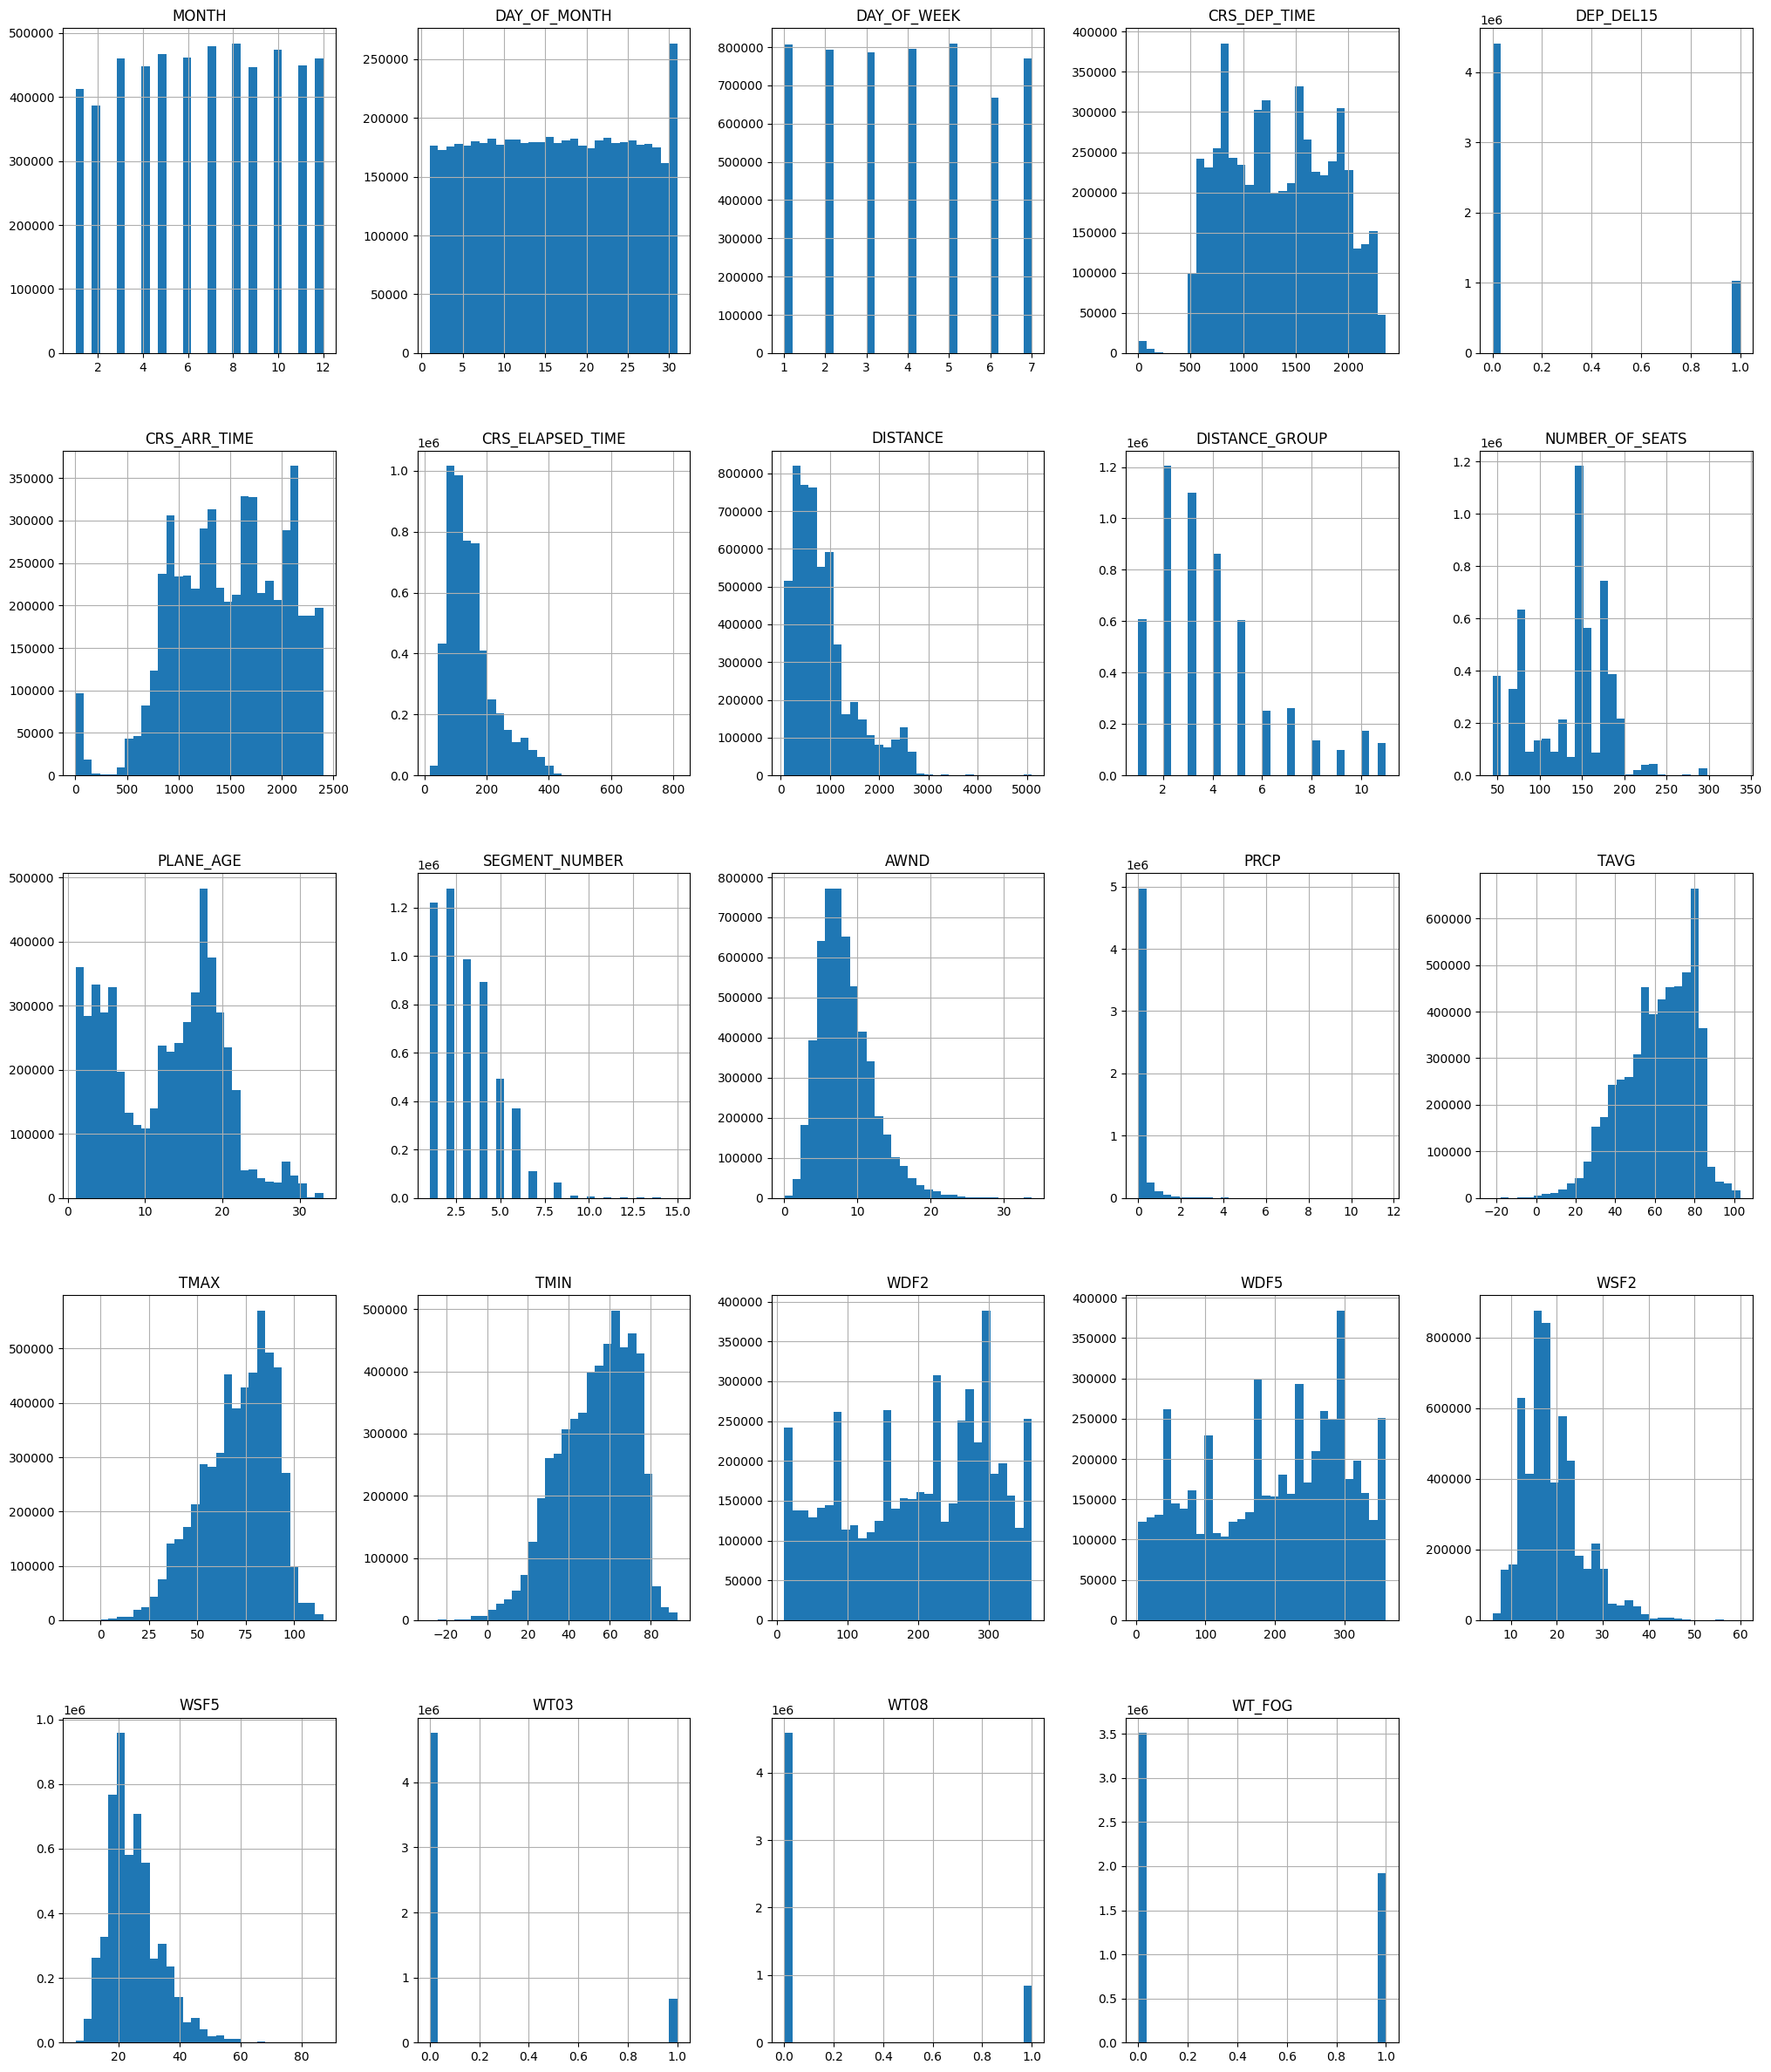

In [30]:
df.hist(bins=30, figsize=(25, 30))

In [31]:
df.to_csv('data/Cleaned.csv',index= False)

In [32]:
df.shape

(5430342, 29)

## Training

## Evaluation